In [1]:
import pandas as pd
import numpy as np

# Load the Strava dataset
file_path = r"C:\Semester 3\Capstone\Project\strava_activities.csv"
df = pd.read_csv(file_path)

# Display shape and first few rows
print("File Loaded. Shape:", df.shape)
df.head()


File Loaded. Shape: (2351, 87)


,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Total Grit,Average Flow,Flagged,Average Elapsed Speed,Dirt Distance,Newly Explored Distance,Newly Explored Dirt Distance,Activity Count,Total Steps,Media
0,477882782,"1 Jan 2016, 21:21:39",Morning Run,Run,NaN,6948,21.15,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,477882787,"17 Jan 2016, 22:05:40",Morning Run,Run,NaN,2680,8.09,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,477882788,"18 Jan 2016, 22:18:36",Morning Run,Run,NaN,2657,8.17,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,477882789,"16 Jan 2016, 21:10:39",Morning Run,Run,NaN,5401,16.43,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,477882792,"19 Jan 2016, 23:02:41",Morning Run,Run,NaN,2587,8.11,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check columns to understand what we’re working with
print(df.columns.tolist())


['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type', 'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate', 'Relative Effort', 'Commute', 'Activity Private Note', 'Activity Gear', 'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1', 'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High', 'Max Grade', 'Average Grade', 'Average Positive Grade', 'Average Negative Grade', 'Max Cadence', 'Average Cadence', 'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts', 'Calories', 'Max Temperature', 'Average Temperature', 'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time', 'Downhill Time', 'Other Time', 'Perceived Exertion', 'Type', 'Start Time', 'Weighted Average Power', 'Power Count', 'Prefer Perceived Exertion', 'Perceived Relative Effort', 'Commute.1', 'Total Weight Lifted', 'From Upload', 'Grade Adjusted Distance', 'Weather Observation Time', 'Weather

In [5]:
# Clean column names to lowercase and replace spaces
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [18]:
# Convert date and time columns (use lowercase names after cleaning)
df['activity_date'] = pd.to_datetime(df['activity_date'], errors='coerce')

if 'start_time' in df.columns:
    df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')


In [20]:
print(df.columns.tolist())


['activity_id', 'activity_date', 'activity_name', 'activity_type', 'elapsed_time', 'distance', 'max_heart_rate', 'relative_effort', 'commute', 'filename', 'athlete_weight', 'elapsed_time.1', 'moving_time', 'distance.1', 'max_speed', 'average_speed', 'elevation_gain', 'elevation_loss', 'elevation_low', 'elevation_high', 'max_grade', 'average_grade', 'max_cadence', 'average_cadence', 'max_heart_rate.1', 'average_heart_rate', 'calories', 'average_temperature', 'relative_effort.1', 'commute.1', 'from_upload', 'flagged', 'average_elapsed_speed', 'dirt_distance']


In [26]:
# Remove rows where essential data like distance, time or calories is missing
df = df.dropna(subset=['distance', 'elapsed_time'])


In [28]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [30]:
# Check cleaned structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   activity_id            2351 non-null   int64         
 1   activity_date          2351 non-null   datetime64[ns]
 2   activity_name          2351 non-null   object        
 3   activity_type          2351 non-null   object        
 4   elapsed_time           2351 non-null   int64         
 5   distance               2351 non-null   object        
 6   max_heart_rate         1500 non-null   float64       
 7   relative_effort        1500 non-null   float64       
 8   commute                2351 non-null   bool          
 9   filename               2339 non-null   object        
 10  athlete_weight         1184 non-null   float64       
 11  elapsed_time.1         2329 non-null   float64       
 12  moving_time            2351 non-null   float64       
 13  dis

In [34]:
# onvert key numeric columns to float
cols_to_convert = [
    'distance', 'elapsed_time', 'calories',
    'average_heart_rate', 'max_heart_rate',
    'average_cadence'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [36]:
# Speed (m/s and km/h)
df['speed_mps'] = df['distance'] * 1000 / df['elapsed_time']
df['speed_kph'] = df['speed_mps'] * 3.6

# Calories per KM
df['calories_per_km'] = df['calories'] / df['distance']

# Calories per minute
df['calories_per_min'] = df['calories'] / (df['elapsed_time'] / 60)

# Heart Rate Reserve
df['hr_reserve'] = df['max_heart_rate'] - df['average_heart_rate']

# HR Intensity Ratio
df['hr_intensity_ratio'] = df['average_heart_rate'] / df['max_heart_rate']

# Cadence to Speed ratio
df['cadence_speed_ratio'] = df['average_cadence'] / df['speed_kph']


In [38]:
# Save the enhanced DataFrame with KPIs to a CSV file
df.to_csv("strava_activities_with_kpis.csv", index=False)


In [48]:
print(df['speed_kph'].describe())
print(df['speed_kph'].value_counts().head(10))


count     2143.000000
mean        57.806193
std        760.300737
min          0.000000
25%         10.158559
50%         10.717753
75%         12.450107
max      31680.000000
Name: speed_kph, dtype: float64
speed_kph
0.000000     39
10.557185     2
10.285714     2
11.968478     2
10.498909     2
10.893556     2
10.432793     2
9.074380      2
9.878906      2
9.926539      2
Name: count, dtype: int64


In [50]:
print(df['speed_kph'].dtype)


float64


In [52]:
df_filtered = df[(df['speed_kph'] > 0) & (df['speed_kph'] < 50)]


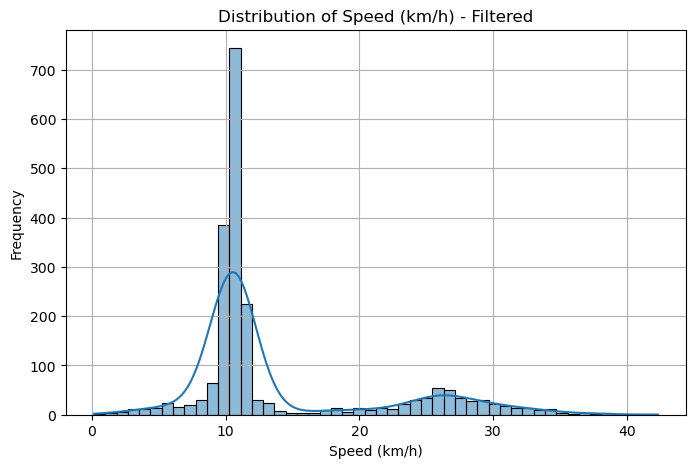

In [54]:
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered['speed_kph'], bins=50, kde=True)
plt.title('Distribution of Speed (km/h) - Filtered')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [60]:
# Remove rows with 0 or missing calories and distance
df_filtered = df[(df['calories'] > 50) & (df['distance'] > 0)]


In [62]:
# Remove rows with 0 or missing calories and distance
df_filtered = df[(df['calories'] > 50) & (df['distance'] > 0)]


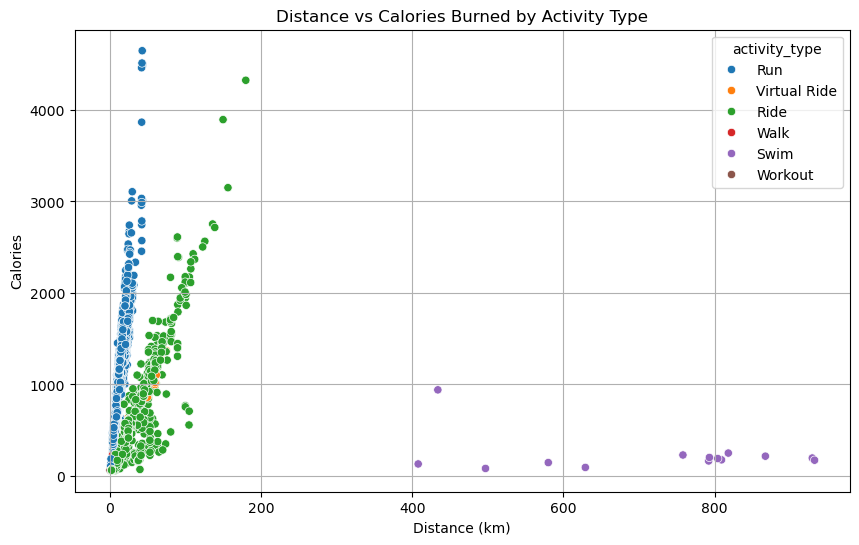

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='calories', hue='activity_type', data=df_filtered)
plt.title("Distance vs Calories Burned by Activity Type")
plt.xlabel("Distance (km)")
plt.ylabel("Calories")
plt.grid(True)
plt.show()


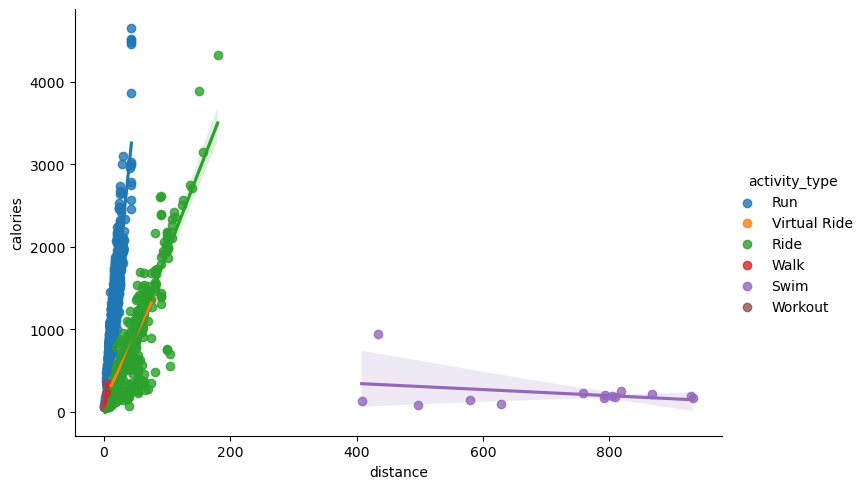

In [66]:
sns.lmplot(x='distance', y='calories', hue='activity_type', data=df_filtered, aspect=1.5)


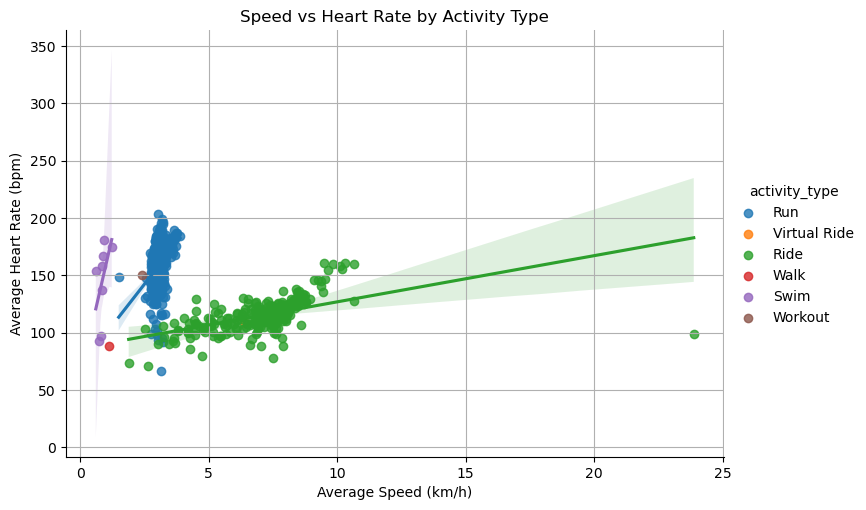

In [68]:
sns.lmplot(x='average_speed', y='average_heart_rate', hue='activity_type', data=df_filtered, aspect=1.5)
plt.title("Speed vs Heart Rate by Activity Type")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Average Heart Rate (bpm)")
plt.grid(True)
plt.show()


C:\Users\sriha\AppData\Local\Temp\ipykernel_26840\987892547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['calories_per_km'] = df_filtered['calories'] / df_filtered['distance']


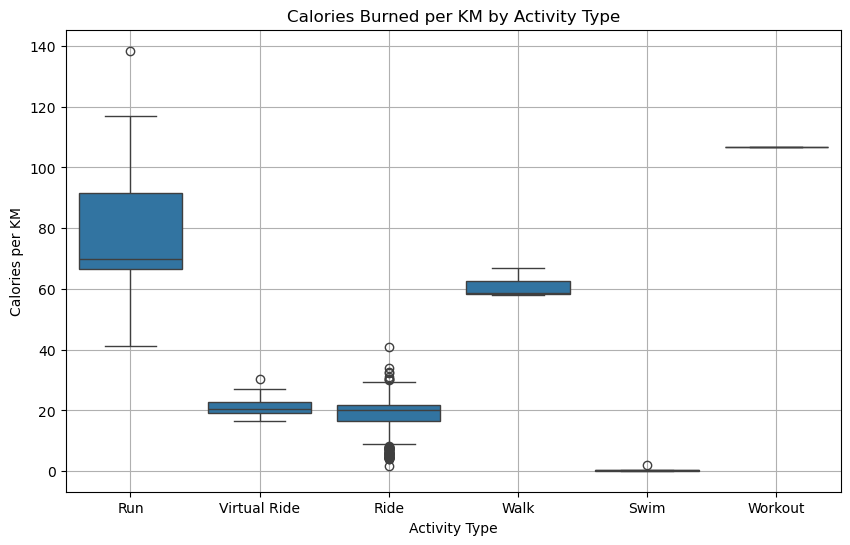

In [70]:
df_filtered['calories_per_km'] = df_filtered['calories'] / df_filtered['distance']
plt.figure(figsize=(10,6))
sns.boxplot(x='activity_type', y='calories_per_km', data=df_filtered)
plt.title("Calories Burned per KM by Activity Type")
plt.ylabel("Calories per KM")
plt.xlabel("Activity Type")
plt.grid(True)
plt.show()


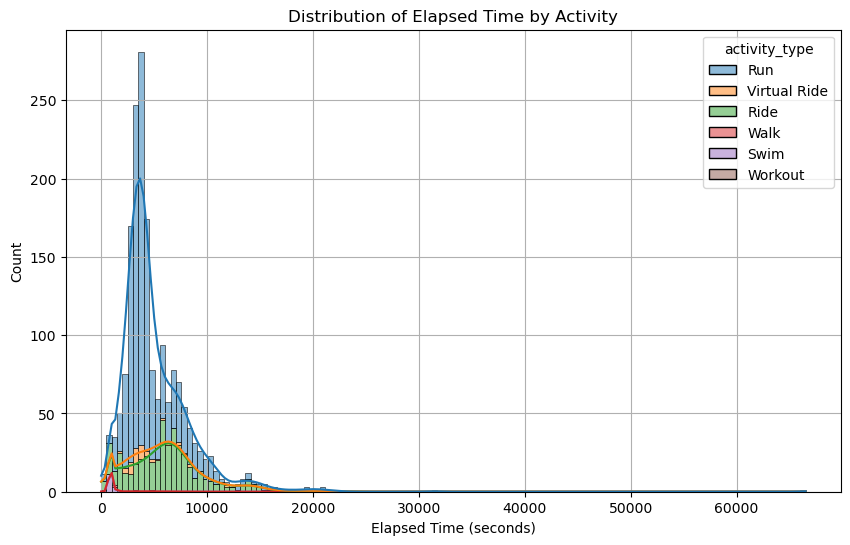

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_filtered, x='elapsed_time', hue='activity_type', kde=True, multiple="stack")
plt.title("Distribution of Elapsed Time by Activity")
plt.xlabel("Elapsed Time (seconds)")
plt.grid(True)
plt.show()


C:\Users\sriha\AppData\Local\Temp\ipykernel_26840\1368481988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hr_zone'] = pd.cut(df_filtered['average_heart_rate'], bins=[60, 100, 120, 140, 160, 200], labels=['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5'])


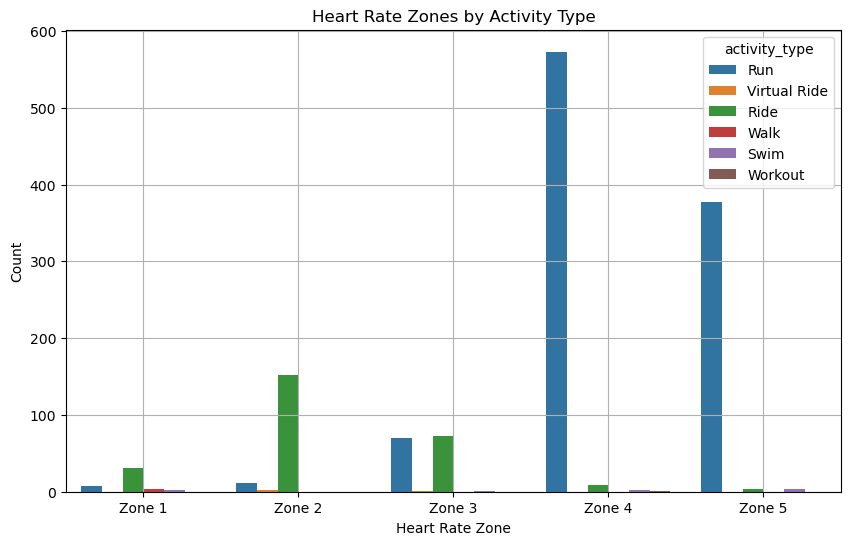

In [74]:
df_filtered['hr_zone'] = pd.cut(df_filtered['average_heart_rate'], bins=[60, 100, 120, 140, 160, 200], labels=['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5'])
plt.figure(figsize=(10,6))
sns.countplot(x='hr_zone', hue='activity_type', data=df_filtered)
plt.title("Heart Rate Zones by Activity Type")
plt.xlabel("Heart Rate Zone")
plt.ylabel("Count")
plt.grid(True)
plt.show()


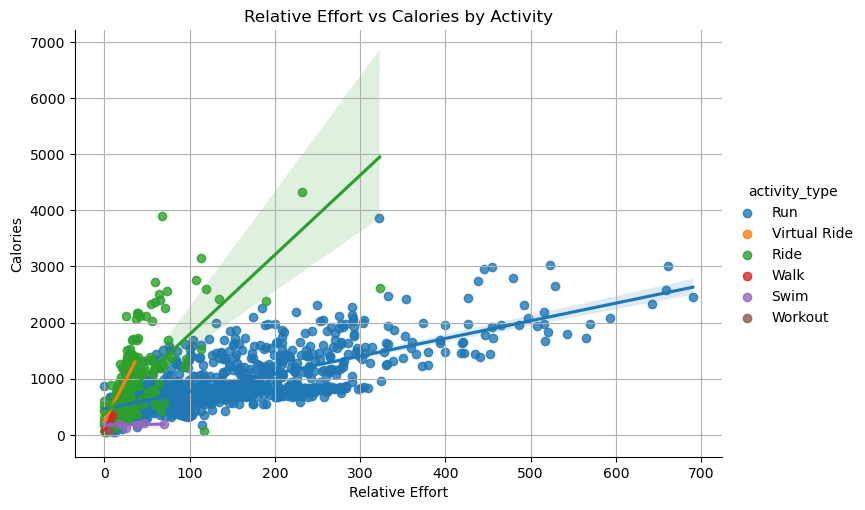

In [76]:
sns.lmplot(x='relative_effort', y='calories', hue='activity_type', data=df_filtered, aspect=1.5)
plt.title("Relative Effort vs Calories by Activity")
plt.xlabel("Relative Effort")
plt.ylabel("Calories")
plt.grid(True)
plt.show()


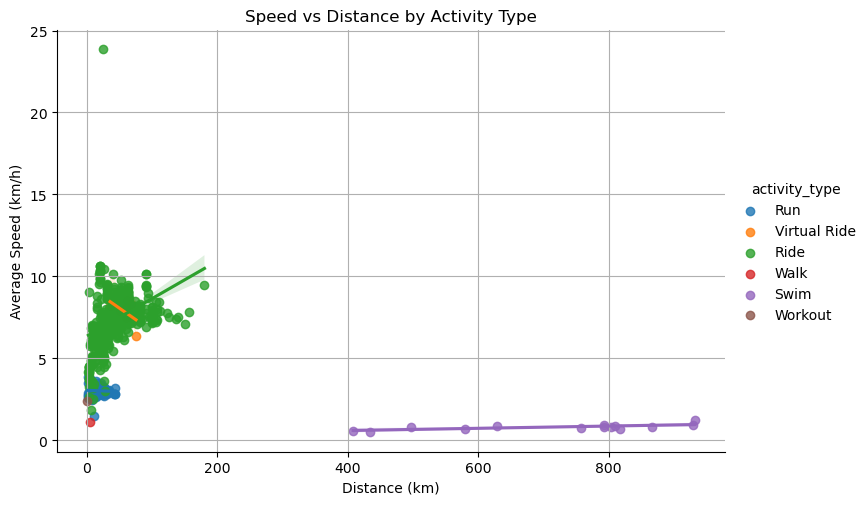

In [78]:
sns.lmplot(x='distance', y='average_speed', hue='activity_type', data=df_filtered, aspect=1.5)
plt.title("Speed vs Distance by Activity Type")
plt.xlabel("Distance (km)")
plt.ylabel("Average Speed (km/h)")
plt.grid(True)
plt.show()


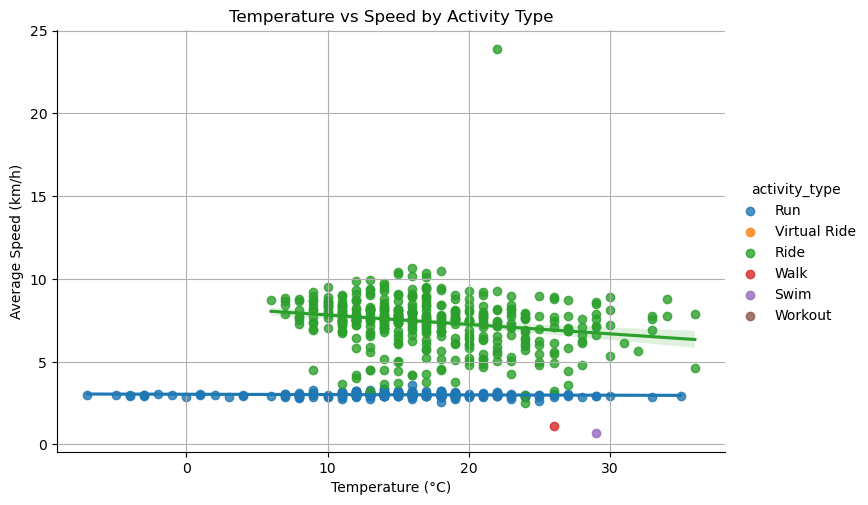

In [80]:
sns.lmplot(x='average_temperature', y='average_speed', hue='activity_type', data=df_filtered, aspect=1.5)
plt.title("Temperature vs Speed by Activity Type")
plt.xlabel("Temperature (°C)")
plt.ylabel("Average Speed (km/h)")
plt.grid(True)
plt.show()


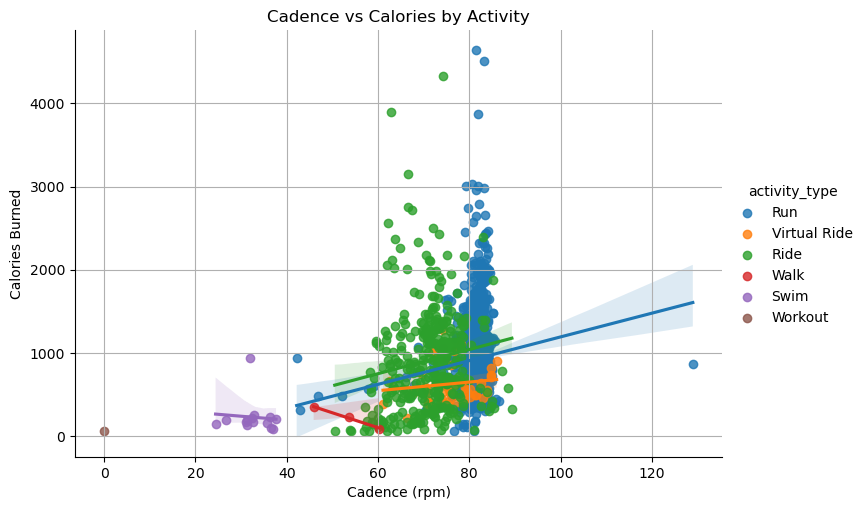

In [82]:
sns.lmplot(x='average_cadence', y='calories', hue='activity_type', data=df_filtered, aspect=1.5)
plt.title("Cadence vs Calories by Activity")
plt.xlabel("Cadence (rpm)")
plt.ylabel("Calories Burned")
plt.grid(True)
plt.show()


C:\Users\sriha\AppData\Local\Temp\ipykernel_26840\1037503689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['effort_score'] = df_filtered['calories'] * df_filtered['average_heart_rate'] / 1000


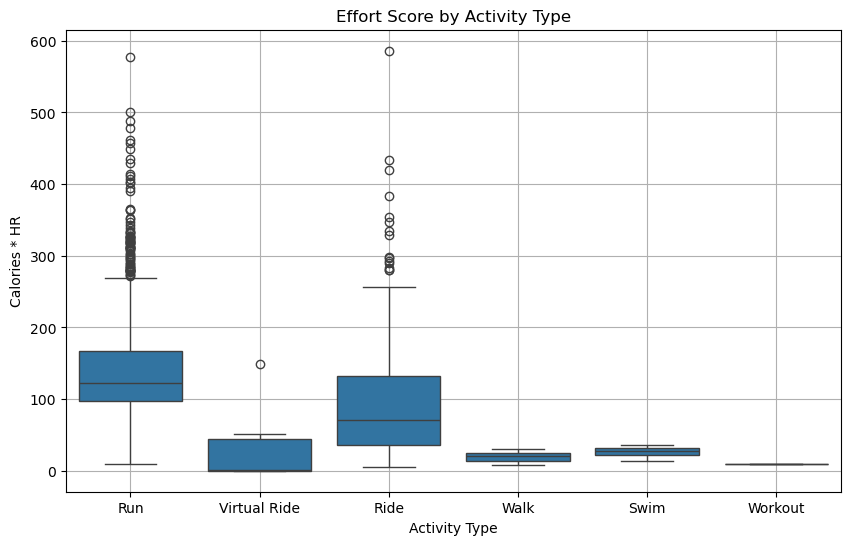

In [84]:
df_filtered['effort_score'] = df_filtered['calories'] * df_filtered['average_heart_rate'] / 1000
plt.figure(figsize=(10,6))
sns.boxplot(x='activity_type', y='effort_score', data=df_filtered)
plt.title("Effort Score by Activity Type")
plt.ylabel("Calories * HR")
plt.xlabel("Activity Type")
plt.grid(True)
plt.show()


In [86]:
# Keep only numeric columns
numeric_df = df_filtered.select_dtypes(include=['float64', 'int64'])


In [88]:
# Compute the Pearson correlation matrix
correlation_matrix = numeric_df.corr()


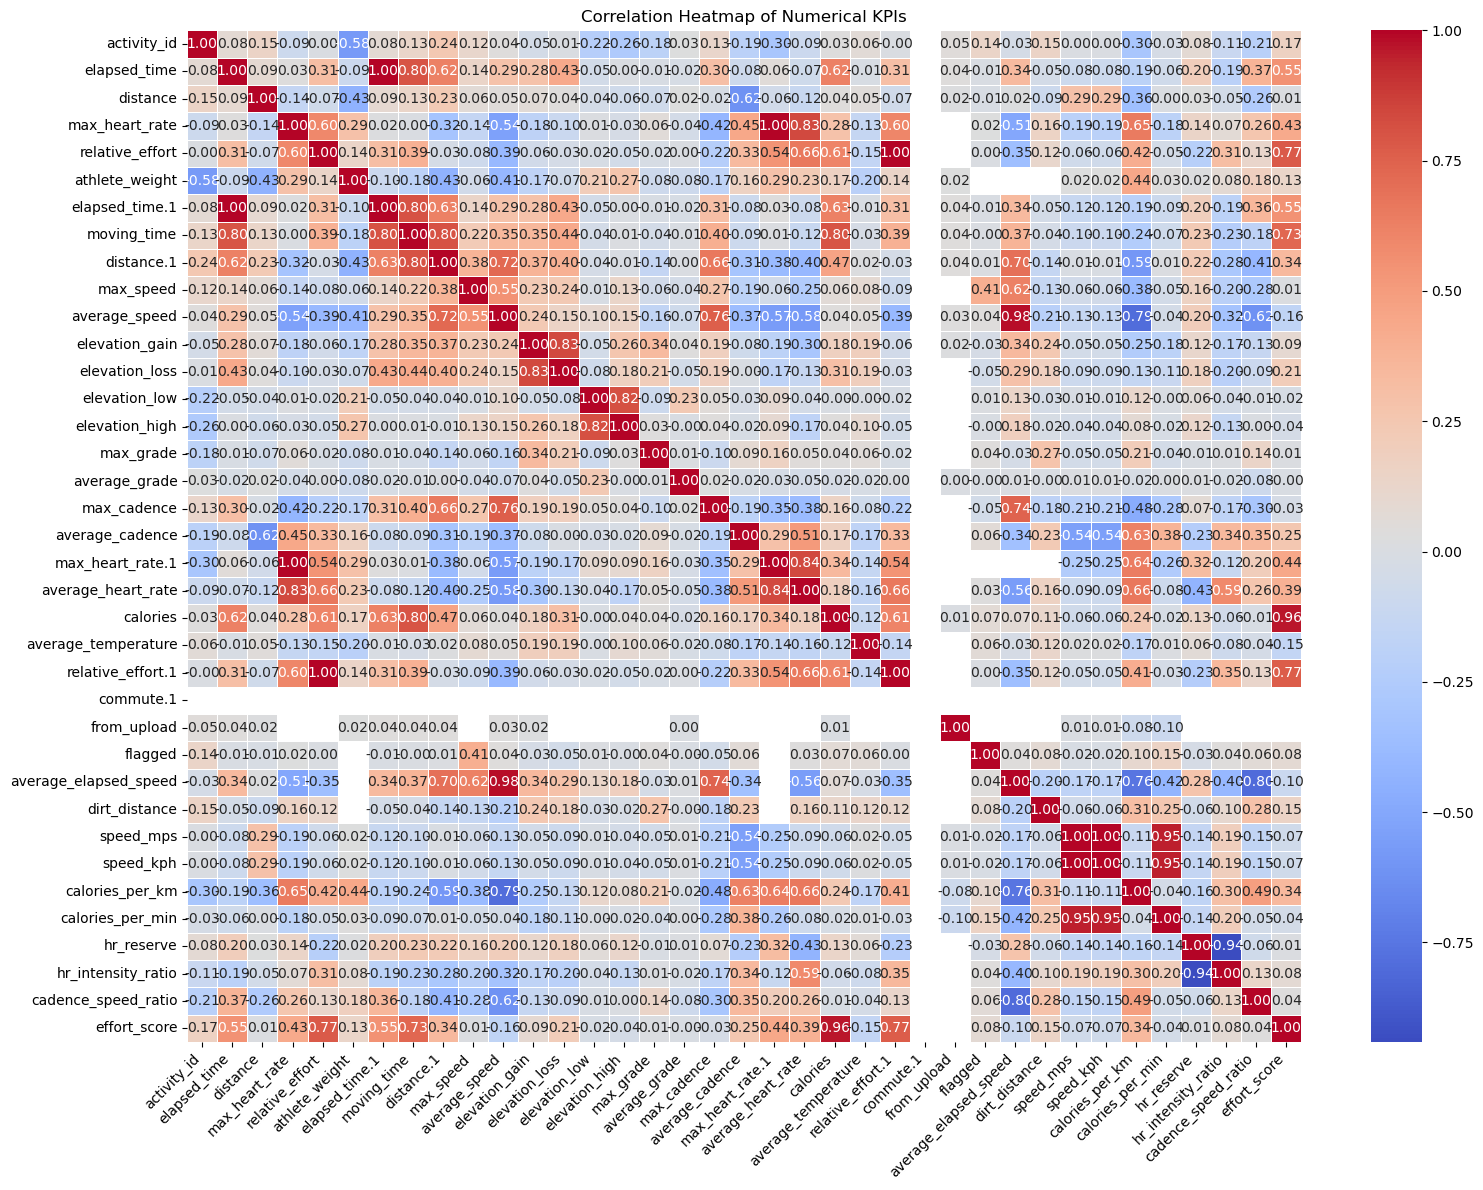

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical KPIs")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\sriha\AppData\Local\Temp\ipykernel_26840\1063509347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['calories_per_km'] = df_filtered['calories'] / df_filtered['distance']


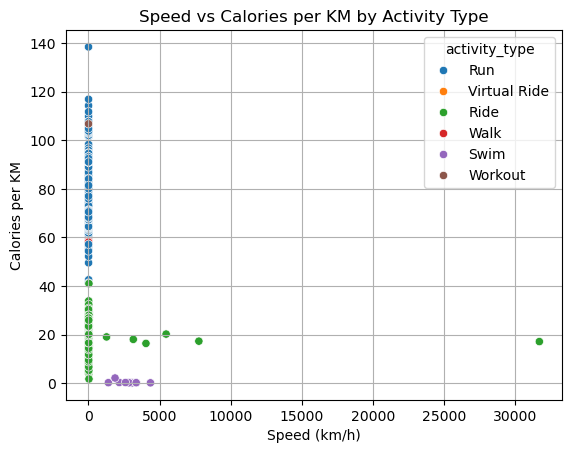

In [96]:
df_filtered['calories_per_km'] = df_filtered['calories'] / df_filtered['distance']

sns.scatterplot(x='speed_kph', y='calories_per_km', hue='activity_type', data=df_filtered)
plt.title('Speed vs Calories per KM by Activity Type')
plt.xlabel('Speed (km/h)')
plt.ylabel('Calories per KM')
plt.grid(True)
plt.show()


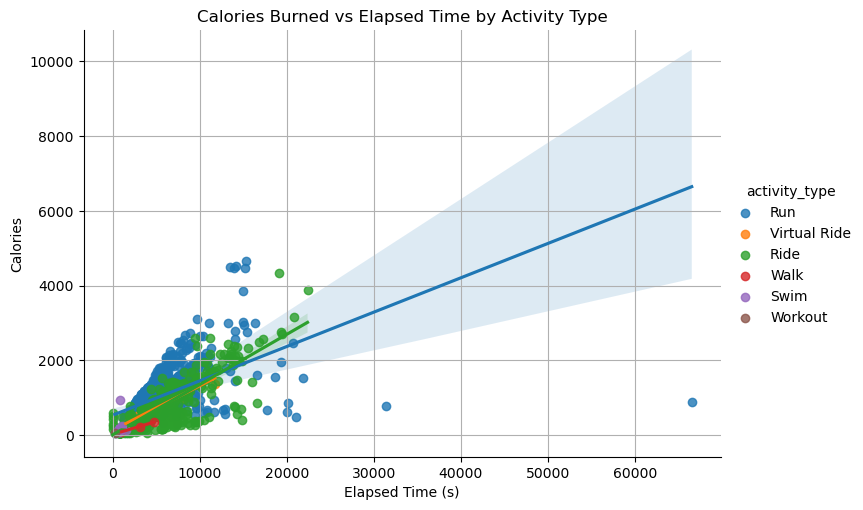

In [98]:
sns.lmplot(x='elapsed_time', y='calories', hue='activity_type', data=df_filtered, aspect=1.5)
plt.title('Calories Burned vs Elapsed Time by Activity Type')
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Calories')
plt.grid(True)
plt.show()


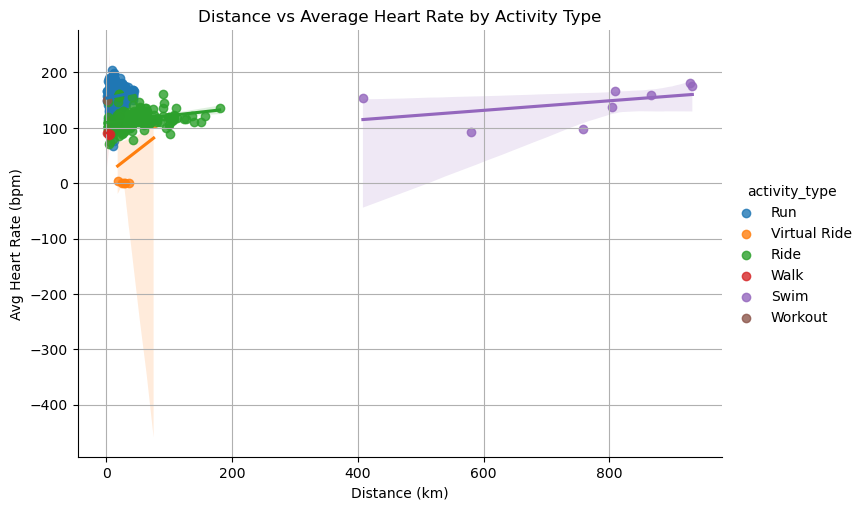

In [102]:
sns.lmplot(x='distance', y='average_heart_rate', hue='activity_type', data=df_filtered, aspect=1.5)
plt.title('Distance vs Average Heart Rate by Activity Type')
plt.xlabel('Distance (km)')
plt.ylabel('Avg Heart Rate (bpm)')
plt.grid(True)
plt.show()


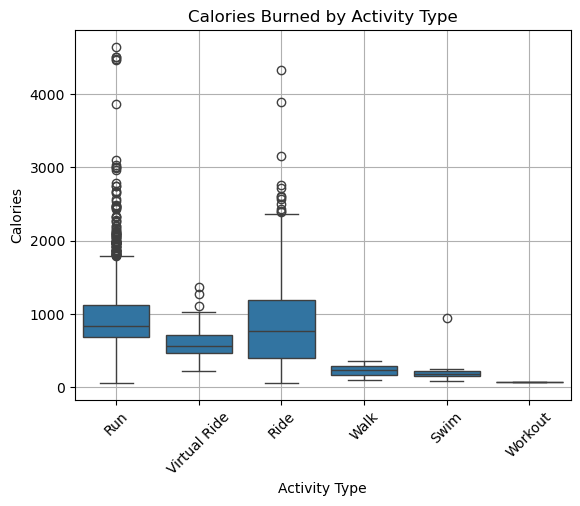

In [104]:
sns.boxplot(x='activity_type', y='calories', data=df_filtered)
plt.title('Calories Burned by Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


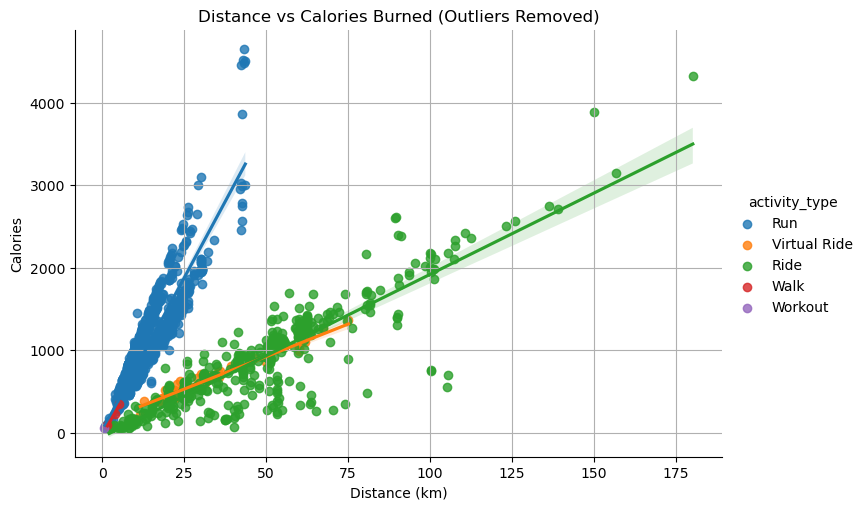

In [106]:
# Filter out extreme distance/calorie values
df_cleaned = df_filtered[(df_filtered['distance'] < 200) & (df_filtered['calories'] < 5000)]

sns.lmplot(x='distance', y='calories', hue='activity_type', data=df_cleaned, aspect=1.5)
plt.title("Distance vs Calories Burned (Outliers Removed)")
plt.xlabel("Distance (km)")
plt.ylabel("Calories")
plt.grid(True)
plt.show()


In [110]:
# Save the updated DataFrame with KPIs into a new CSV file
df.to_csv(r'C:\Semester 3\Capstone\Project\strava_activities_with_kpis.csv', index=False)

print("Saved successfully at: C:/Semester 3/Capstone/Project/strava_activities_with_kpis.csv")


Saved successfully at: C:/Semester 3/Capstone/Project/strava_activities_with_kpis.csv
